In [104]:
import sympy as sp
sp.init_printing(use_latex ='mathjax')

import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [105]:
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
k12, k13, k23 = (6.5*10**-5, 10**-5,10**-5)

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2, m3 = (2.7*10**-17,1.9*10**-17, 2.75*10**-17)

#Driving force amplitude
F = (3*10**-5)

#driving frequency (leave as variable)
wd = sp.symbols('\omega_d')

#Solve for the eigenefrequencies of steady state solutions

steadyState = sp.Matrix([[(k1/m1) + (k12/m1)+ (k13/m1), -k12/m1, -k13/m1], [-(k12/
  m2), (k2/m2) + (k12/m2) + (k23/m2), -(k23/m2)], [-k13/m3, -(k23/
  m3), (k3/m3) + (k23/m3)+ (k13/m3)]])

(e1,mult1,A), (e2,mult2,B), (e3,mult3,C)= steadyState.eigenvects()

#Neglect imaginary part because it is very small
w1, w2, w3 = (sp.sqrt(sp.re(e1)-((g1/m1)**2)/4), sp.sqrt(sp.re(e2)-((g2/m2)**2)/4), sp.sqrt(sp.re(e3)-((g3/m3)**2)/4))

In [106]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, -(k13/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [-(k13/m3), -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k13/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), F/m1, -(k13/m1)], [-k12/m2, 0, -k23/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2),0], [-(k13/m3), -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [107]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(wd,delta1)
delta2_f = sp.lambdify(wd,delta2)
delta3_f = sp.lambdify(wd,delta3)

wrap1_f=sp.lambdify(wd,wrap1)
wrap2_f=sp.lambdify(wd,wrap2)
wrap3_f=sp.lambdify(wd,wrap3)

amp1_f = sp.lambdify(wd,amp1)
amp2_f = sp.lambdify(wd,amp2)
amp3_f = sp.lambdify(wd,amp3)

#Make an array of wd values

wd_vals = np.linspace(1.46*10**7, 1.6*10**7, 500)

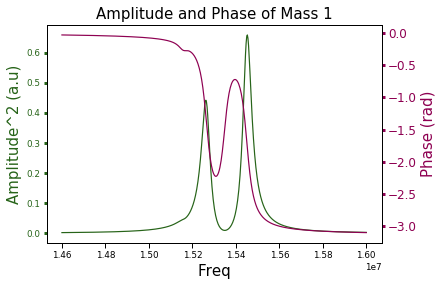

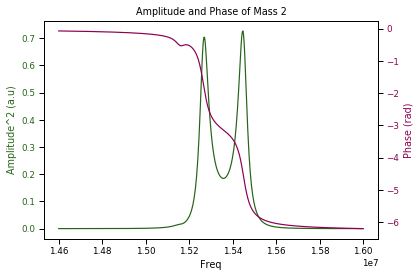

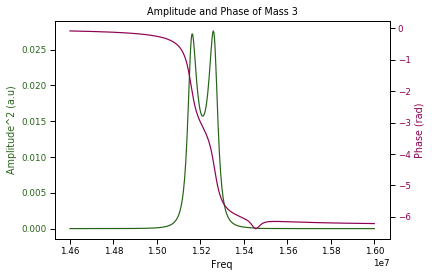

In [108]:
#Make Plots with matplotlib

#Plot first mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 1', size = 15)
ax1.set_xlabel('Freq', size = 15)
ax1.set_ylabel('Amplitude^2 (a.u)', size = 15, color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color, color=color, width = 3, length = 3)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', size = 15, color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color, color=color, length = 3, width = 3, labelsize = 12)

plt.show()

#Plot second mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 2')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp2_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta2_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

#Plot third mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 3')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp3_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta3_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

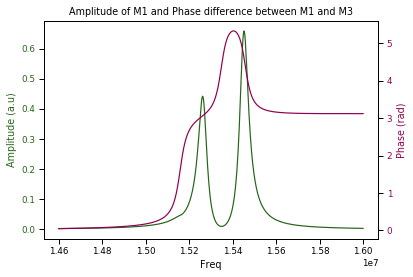

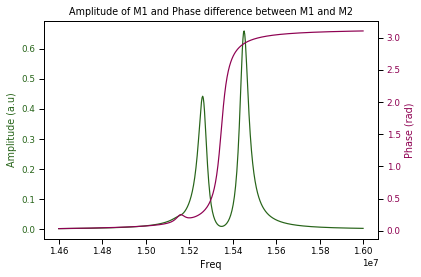

In [109]:
#Plot differences

fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude of M1 and Phase difference between M1 and M3')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude (a.u)', color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals))-np.unwrap(delta3_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()


fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude of M1 and Phase difference between M1 and M2')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude (a.u)', color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals))-np.unwrap(delta2_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

In [125]:
#plot phase differences as a function of k23/k13 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (1.7449,0.4284,1.7449)

#springs that connect two masses
k12 = 0.0109
#k13, k23 = (10**-5,10**-5)
k123= sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (3*10**5,3*10**5,3*10**5)
 
#masses
m1, m2, m3 = (1.89*10**-16,4.76*10**-17, 1.94*10**-16)

#Driving force amplitude
F = (7.65*10**-3)

In [126]:
#Solve for the eigenefrequencies of two mass model
steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1], [-(k12/ m2), (k2/m2) + (k12/m2)]])
(e1,mult1,A), (e2,mult2,B)= steadyState.eigenvects()

#Neglect imaginary part because it is very small 
w1, w2= (sp.sqrt(e1)), (sp.sqrt(e2))

print (w1, w2)

95606367.1070927 96841939.5467149


In [127]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w1-0.377*10**6

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k123/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [128]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k123, delta1)
delta2_f = sp.lambdify(k123, delta2)
delta3_f = sp.lambdify(k123, delta3)

amp1_f = sp.lambdify(k123, amp1)
amp2_f = sp.lambdify(k123, amp2)
amp3_f = sp.lambdify(k123, amp3)


#Solve functions for low frequency mode
k123_vals = np.linspace(10**-5, 10**-2, 10**6)

phasediff1_low = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals))
phasediff2_low = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals))

amp_m1_low = amp1_f(k123_vals)
amp_m2_low = amp2_f(k123_vals)
amp_m3_low = amp3_f(k123_vals)

In [130]:
d12 = (delta1_f(10**-3)-delta2_f(10**-3))*180/np.pi
A21 = (amp2_f(10**-3)/amp1_f(10**-3))
A31 = (amp3_f(10**-3)/amp1_f(10**-3))
A32 = (amp3_f(10**-3)/amp2_f(10**-3))

print("delta 1 - delta 2 =", d12)
print("Ratio A3/A1 = ", A31)
print("Ratio A3/A2 = ", A32)
print("Ratio A2/A1 = ", A21)

delta 1 - delta 2 = 9.234851070123225
Ratio A3/A1 =  0.16346188600671469
Ratio A3/A2 =  0.13294655599370184
Ratio A2/A1 =  1.2295308049533715


In [131]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w2 + 0.44*10**6

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k123/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [132]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k123, delta1)
delta2_f = sp.lambdify(k123, delta2)
delta3_f = sp.lambdify(k123, delta3)

amp1_f = sp.lambdify(k123, amp1)
amp2_f = sp.lambdify(k123, amp2)
amp3_f = sp.lambdify(k123, amp3)


#Solve functions for low frequency mode
k123_vals = np.linspace(10**-5, 10**-2, 10**6)

phasediff1_high = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals))
phasediff2_high = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals))

amp1_high = amp1_f(k123_vals)
amp2_high = amp2_f(k123_vals)
amp3_high = amp3_f(k123_vals)

In [134]:
d12 = (delta1_f(10**-3)-delta2_f(10**-3))*180/np.pi
A21 = (amp2_f(10**-3)/amp1_f(10**-3))
A31 = (amp3_f(10**-3)/amp1_f(10**-3))
A32 = (amp3_f(10**-3)/amp2_f(10**-3))

print("delta 1 - delta 2 =", d12)
print("Ratio A3/A1 = ", A31)
print("Ratio A3/A2 = ", A32)
print("Ratio A2/A1 = ", A21)

delta 1 - delta 2 = -187.782578916659
Ratio A3/A1 =  0.0017109754273644964
Ratio A3/A2 =  0.0016120318497751466
Ratio A2/A1 =  1.0613781778586762


/Users/brittanycarter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/brittanycarter/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


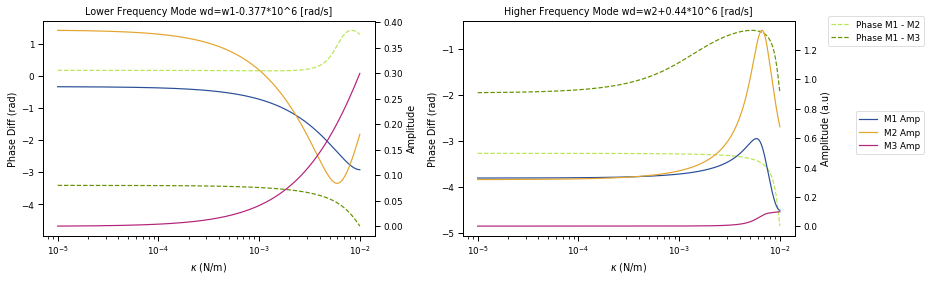

In [123]:
#Make an array of wd values
import seaborn as sns

fig, (ax1, ax3) = plt.subplots(1, 2, figsize = (13, 4))

m1_col = "#2A4F98"
m2_col = '#E4A52D'
m3_col = '#B4237B'
phasediff_1 = '#B9E753'
phasediff_2 = '#669300'

sns.set_context('paper')

#ax1.set_title('Lower Frequency Mode')
ax1.set_xlabel('$\kappa$ (N/m)')
ax1.set_ylabel('Phase Diff (rad)')
ax1.plot(k123_vals, phasediff1_low, '--', color = phasediff_1)
ax1.plot(k123_vals, phasediff2_low, '--', color = phasediff_2)
ax1.tick_params(axis = 'y')
ax1.set_xscale('log')
ax1.set_title('Lower Frequency Mode wd=w1-0.377*10^6 [rad/s]')


ax2 = ax1.twinx()

ax2.set_ylabel('Amplitude')
ax2.plot(k123_vals, amp_m1_low, color= m1_col)
ax2.plot(k123_vals, amp_m2_low, color= m2_col)
ax2.plot(k123_vals, amp_m3_low, color= m3_col)
ax2.tick_params(axis = 'y') 


#ax3.set_title('Higher Frequency Mode')
ax3.set_xlabel('$\kappa$ (N/m)')
ax3.set_ylabel('Phase Diff (rad)')
ax3.plot(k123_vals, phasediff1_high, '--', color = phasediff_1, label = "Phase M1 - M2")
ax3.plot(k123_vals, phasediff2_high, '--', color = phasediff_2, label = "Phase M1 - M3")
ax3.tick_params(axis = 'y')
ax3.set_xscale('log')
ax3.set_title('Higher Frequency Mode wd=w2+0.44*10^6 [rad/s]')
ax3.legend(bbox_to_anchor = (1.4,1.04)) 
 
ax4 = ax3.twinx()

ax4.set_ylabel('Amplitude (a.u)')
ax4.plot(k123_vals, amp1_high, color= m1_col, label = 'M1 Amp')
ax4.plot(k123_vals, amp2_high, color= m2_col, label = 'M2 Amp')
ax4.plot(k123_vals, amp3_high, color= m3_col, label = "M3 Amp")
ax4.tick_params(axis = 'y')
ax4.legend(bbox_to_anchor = (1.4,0.6))  

plt.tight_layout()

#fig.savefig('/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/Mass3CouplingPlots.pdf', bbox_inches= 'tight', pad_inches=0.05)

plt.show()

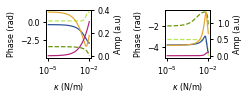

In [24]:
#Make an array of wd values
import seaborn as sns

fig, (ax1, ax3) = plt.subplots(1, 2, figsize = (3.45, 1.48))

m1_col = "#2A4F98"
m2_col = '#E4A52D'
m3_col = '#B4237B'
phasediff_1 = '#B9E753'
phasediff_2 = '#669300'

#sns.set_context('paper')
font = 8

#ax1.set_title('Lower Frequency Mode')
ax1.set_xlabel('$\kappa$ (N/m)', size = font)
ax1.set_ylabel('Phase (rad)', size = font)
ax1.plot(k123_vals, phasediff1_low, '--', color = phasediff_1)
ax1.plot(k123_vals, phasediff2_low, '--', color = phasediff_2)
ax1.tick_params(axis = 'y', length = 3, labelsize = font)
ax1.tick_params(axis = 'x', length = 3, labelsize = font)
ax1.set_xscale('log')
ax1.set_xticks([10**-5, 10**-2])


ax2 = ax1.twinx()

ax2.set_ylabel('Amp (a.u)', size = font)
ax2.plot(k123_vals, amp_m1_low, color= m1_col)
ax2.plot(k123_vals, amp_m2_low, color= m2_col)
ax2.plot(k123_vals, amp_m3_low, color= m3_col)
ax2.tick_params(axis = 'y', length = 3, labelsize = font) 


#ax3.set_title('Higher Frequency Mode')
ax3.set_xlabel('$\kappa$ (N/m)', size = font)
ax3.set_ylabel('Phase (rad)', size = font)
ax3.plot(k123_vals, phasediff1_high, '--', color = phasediff_1, label = "Phase M1 - M2")
ax3.plot(k123_vals, phasediff2_high, '--', color = phasediff_2, label = "Phase M1 - M3")
ax3.tick_params(axis = 'y', length = 3, labelsize = font)
ax3.tick_params(axis = 'x', length = 3, labelsize = font)
ax3.set_xscale('log') 
ax3.set_xticks([10**-5, 10**-2])
 
ax4 = ax3.twinx()

ax4.set_ylabel('Amp (a.u)', size = font)
ax4.plot(k123_vals, amp1_high, color= m1_col, label = 'M1 Amp')
ax4.plot(k123_vals, amp2_high, color= m2_col, label = 'M2 Amp')
ax4.plot(k123_vals, amp3_high, color= m3_col, label = "M3 Amp")
ax4.tick_params(axis = 'y', length = 3, labelsize = font)

plt.tight_layout()

fig.savefig('/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/Mass3CouplingPlots_NoLegend.pdf', bbox_inches= 'tight', pad_inches=0.05)

plt.show()

In [25]:
#Solve for the eigenefrequencies of steady state solutions
#steadyState = sp.Matrix([[(k1/m1) + (k12/m1)+ (k123/m1), -k12/m1, -k123/m1], [-(k12/ m2), (k2/m2) + (k12/m2) + (k123/m2), -(k123/m2)], [-k123/m3, -(k123/ m3), (k3/m3) + (k123/m3)+ (k123/m3)]])
#(e1,mult1,A), (e2,mult2,B), (e3,mult3,C)= steadyState.eigenvects()
#Neglect imaginary part because it is very small w1, w2, w3 = (sp.sqrt(sp.re(e1)-((g1/m1)2)/4), sp.sqrt(sp.re(e2)-((g2/m2)2)/4), sp.sqrt(sp.re(e3)-((g3/m3)**2)/4))

In [26]:
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (1.7449,0.44284,1.7449)

#springs that connect two masses
k12, k23 = (0.0109, 0)
k13 = sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (3*10**5,3*10**5,3*10**5)
 
#masses
m1, m2, m3 = (7*2.7*10**-17,7*0.68*10**-17, 7*2.8*10**-17)

#Driving force amplitude
F = (7.65*10**-3)

#driving frequency (leave as variable)
wd = w1 - 0.06*10**3*2*np.pi

In [27]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, -(k13/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [-(k13/m3), -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k13/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), F/m1, -(k13/m1)], [-k12/m2, 0, -k23/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2),0], [-(k13/m3), -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [28]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k13, delta1)
delta2_f = sp.lambdify(k13, delta2)
delta3_f = sp.lambdify(k13, delta3)

amp1_f = sp.lambdify(k13, amp1)
amp2_f = sp.lambdify(k13, amp2)
amp3_f = sp.lambdify(k13, amp3)

/Users/brittanycarter/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


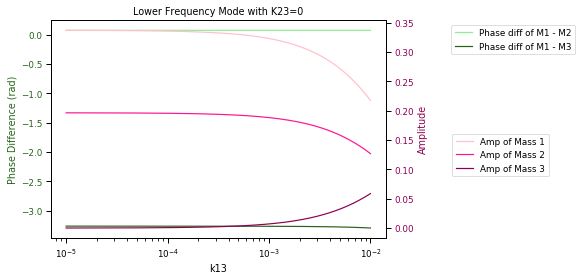

In [29]:
#Make an array of wd values

k123_vals = np.linspace(1*10**-5, 10**-2, 10**6)

fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Lower Frequency Mode with K23=0')
ax1.set_xlabel('k13')
ax1.set_ylabel('Phase Difference (rad)', color=color)
ax1.plot(k123_vals, np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals)), color = 'lightgreen', label = "Phase diff of M1 - M2")
ax1.plot(k123_vals, np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals)), color = color, label = "Phase diff of M1 - M3")
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.set_xscale('log')
plt.legend(bbox_to_anchor = (1.58,1)) 

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Amplitude', color=color)
ax2.plot(k123_vals, amp1_f(k123_vals), color= 'pink', label = 'Amp of Mass 1')
ax2.plot(k123_vals, amp2_f(k123_vals), color='deeppink', label = 'Amp of Mass 2')
ax2.plot(k123_vals, amp3_f(k123_vals), color=color, label = "Amp of Mass 3")
ax2.tick_params(axis = 'y', labelcolor = color)
plt.legend(bbox_to_anchor = (1.5,0.5))  

plt.show()

In [30]:
#plot phase differences as a function of k23/k13 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (1.7449,0.4284,1.7449)

#springs that connect two masses
k12 = 0.0109
k13, k23 = (10**-5,10**-5)
k123= sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (3*10**5,3*10**5,3*10**5)
 
#masses
m1, m2 = (1.89*10**-16,4.76*10**-17)
m3 = sp.symbols('m_3')

#Driving force amplitude
F = (7.65*10**-3)

In [31]:
#Solve for the eigenefrequencies of two mass model
steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1], [-(k12/ m2), (k2/m2) + (k12/m2)]])
(e1,mult1,A), (e2,mult2,B)= steadyState.eigenvects()

#Neglect imaginary part because it is very small 
w1, w2= (sp.sqrt(e1)), (sp.sqrt(e2))

print (w1, w2)

95606367.1070927 96841939.5467149


In [32]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w1 - 0.377*10**6

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k123/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [33]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify((m3, k123), delta1)
delta3_f = sp.lambdify((m3, k123), delta3)

phasediff = sp.lambdify((m3, k123), delta1-delta3)
phasediff2 = sp.lambdify((m3, k123), wrap1-wrap3)

def phasefunc(m_3, k_123):
    return phasediff(m_3, k_123)

def phasefunc2(m_3, k_123):
    return phasediff2(m_3, k_123)

#np.unwrap(delta1_f(m2, k123))-np.unwrap(delta3_f(m3, k123))

m3_vals = np.linspace(1.85*10**-16, 2*10**-16, 100)
k123_vals = np.linspace(10**-2, 10**-5, 100)

a = np.empty((len(m3_vals),len(k123_vals)))
b = np.empty((len(m3_vals),len(k123_vals)))

for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        a[i][j] = phasefunc(m3_vals[i], k123_vals[j])
        
for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        b[i][j] = phasefunc2(m3_vals[i], k123_vals[j])

Text(0, 0.5, 'Mass M3 [kg]')

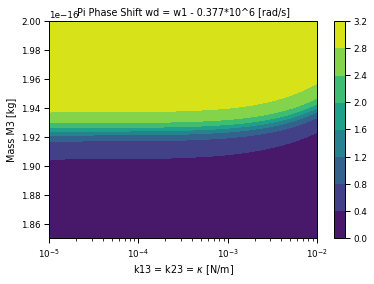

In [34]:
cp = plt.contourf(k123_vals, m3_vals, b)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Pi Phase Shift wd = w1 - 0.377*10^6 [rad/s]')
plt.xlabel('k13 = k23 = $\kappa$ [N/m]')
plt.ylabel('Mass M3 [kg]')

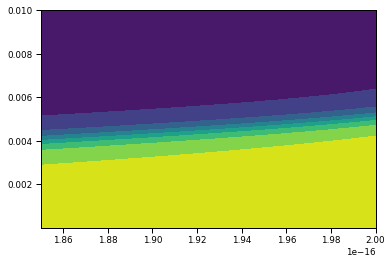

In [37]:
cp = plt.contourf(m3_vals, k123_vals, b)

Text(0, 0.5, 'Mass M3 [kg]')

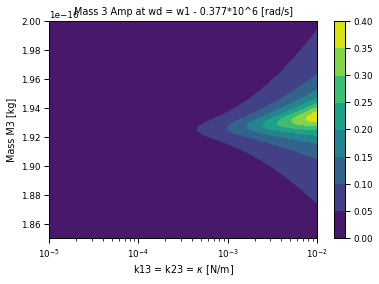

In [38]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

amp3_f = sp.lambdify((m3, k123), amp3)


def ampfunc(m_3, k_123):
    return amp3_f(m_3, k_123)

#np.unwrap(delta1_f(m2, k123))-np.unwrap(delta3_f(m3, k123))

m3_vals = np.linspace(1.85*10**-16, 2*10**-16, 100)
k123_vals = np.linspace(10**-2, 10**-5, 100)

a = np.empty((len(m3_vals),len(k123_vals)))

for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        a[i][j] = ampfunc(m3_vals[i], k123_vals[j])
        
cp = plt.contourf(k123_vals, m3_vals, a)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Mass 3 Amp at wd = w1 - 0.377*10^6 [rad/s]')
plt.xlabel('k13 = k23 = $\kappa$ [N/m]')
plt.ylabel('Mass M3 [kg]')

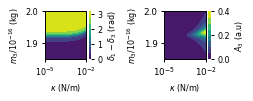

In [39]:
#Plots for paper

#Make an array of wd values
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (3.55, 1.48))

#sns.set_context('paper')
font = 8

cp1 = ax1.contourf(k123_vals, m3_vals/(10**-16), b)
#ax1.set_title('Driven at w1 - 0.377*10^6 [rad/s]')
ax1.set_xscale('log')
ax1.set_xlabel('$\kappa$ (N/m)', size = font)
ax1.set_ylabel('${m_3}/{10^{-16}}$ (kg)', size = font)
ax1.set_yticks([1.9, 2])
ax1.tick_params(length = 3, labelsize = font)
#fig.colorbar(cp1, ax=ax1, label = '$\delta_1-\delta_3$ (rad)', ticks=[0,1,2,3])
cb1 = fig.colorbar(cp1, ax=ax1, ticks=[0,1,2,3])
cb1.outline.set_visible(False)
cb1.ax.tick_params(length = 3, labelsize = font)
cb1.set_label(label = '$\delta_1-\delta_3$ (rad)', size = font)

#cp2 = plt.contourf(k123_vals, m3_vals, a)

cp2 = ax2.contourf(k123_vals, m3_vals/(10**-16), a)
#ax2.set_title('Driven at w1 - 0.377*10^6 [rad/s]')
ax2.set_xscale('log')
ax2.set_xlabel('$\kappa$ (N/m)', size = font)
ax2.set_ylabel('${m_3}/{10^{-16}}$ (kg)', size = font)
ax2.set_yticks([1.9, 2.0])
ax2.tick_params(length = 3)
#fig.colorbar(cp2, ax=ax2, label = '$A_3$ (a.u)', ticks=[0,0.2,0.4])
cb2 = fig.colorbar(cp2, ax=ax2, ticks=[0,0.2,0.4])
cb2.outline.set_visible(False)
cb2.ax.tick_params(length = 3, labelsize = font)
cb2.set_label(label = '$A_3$ (a.u)', size = font)


plt.tight_layout()

fig.savefig('/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/Mass3ContourPlots.pdf', bbox_inches= 'tight', pad_inches=0.05)

plt.show()

In [40]:
#plot phase differences as a function of k23/k13 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (1.7449,0.4284,1.7449)

#springs that connect two masses
k12 = 0.0109
#k13, k23 = (10**-5,10**-5)
k123= sp.symbols('k_123')

#damping coefficients and forc
g1, g2, g3 = (3*10**5,3*10**5,3*10**5)
 
#masses
m1, m2, m3 = (1.89*10**-16,4.76*10**-17, 1.94*10**-16)

#Driving force amplitude
F = (7.65*10**-3)

#Define Drive Frequency
wd = sp.symbols('w_d')

In [41]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k123/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [98]:
amp1_f = sp.lambdify((k123, wd), amp1)
amp2_f = sp.lambdify((k123, wd), amp2)
amp3_f = sp.lambdify((k123, wd), amp3)

k123_vals = np.linspace(10**-4, 10**-1, 200)
wd_vals = np.linspace(9.25*10**7, 10*10**7, 200)

In [99]:
def amp1func(k_123, wd):
    return amp1_f(k_123, wd)

a = np.empty((len(k123_vals),len(wd_vals)))

for i in range (len(k123_vals)):
    for j in range (len(wd_vals)):
        a[j][i] = amp1func(k123_vals[i], wd_vals[j])
        
#df = pd.DataFrame(k123_vals, wd_vals, amp1_f(k123_vals, wd_vals))

Text(0, 0.5, 'Drive Freq [kg]')

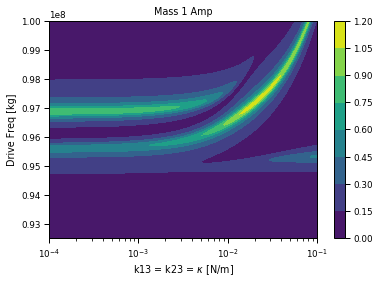

In [103]:
cp = plt.contourf(k123_vals, wd_vals, a)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Mass 1 Amp')
plt.xlabel('k13 = k23 = $\kappa$ [N/m]')
plt.ylabel('Drive Freq [kg]')

Text(0, 0.5, 'Drive Freq [kg]')

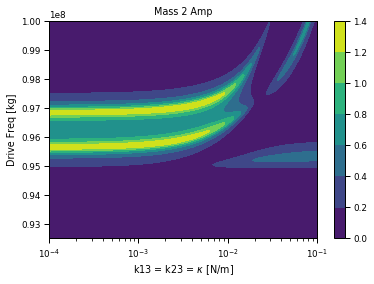

In [101]:
def amp2func(k_123, wd):
    return amp2_f(k_123, wd)

a2 = np.empty((len(k123_vals),len(wd_vals)))

for i in range (len(k123_vals)):
    for j in range (len(wd_vals)):
        a2[j][i] = amp2func(k123_vals[i], wd_vals[j])
        
        
cp = plt.contourf(k123_vals, wd_vals, a2)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Mass 2 Amp')
plt.xlabel('k13 = k23 = $\kappa$ [N/m]')
plt.ylabel('Drive Freq [kg]')

Text(0, 0.5, 'Drive Freq [kg]')

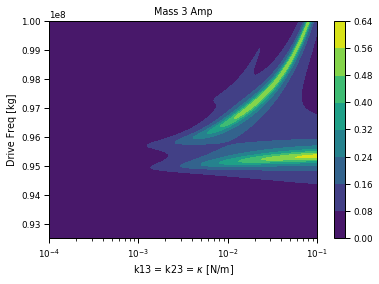

In [102]:
def amp3func(k_123, wd):
    return amp3_f(k_123, wd)

a3 = np.empty((len(k123_vals),len(wd_vals)))

for i in range (len(k123_vals)):
    for j in range (len(wd_vals)):
        a3[j][i] = amp3func(k123_vals[i], wd_vals[j])
        
        
cp = plt.contourf(k123_vals, wd_vals, a3)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Mass 3 Amp')
plt.xlabel('k13 = k23 = $\kappa$ [N/m]')
plt.ylabel('Drive Freq [kg]')